<a href="https://colab.research.google.com/github/ajaysanthoshb/FYP/blob/dev/Finalyear_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Demo to extract heart beat audio to required data..

# Input -> wav file
# Output -> Dataset(may be table, knowledge information like BP,...... )

# ANN, CNN

# 1-> EDA
# 2 -> Preprocessing
# 3 -> Model

#For learning first I am trying with UrbanSound8k

In [ ]:
#EDA - Exploratory Data Analysis -> how does a sound wave look like
# librosa module is used to read the sound wave data like sample rate,how many channels
# scipy read the wave signals

#to install modules we have to use !pip install moduleName

!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# matplotlib is for data visualisation so that we can check how our data looks like, and how our model is performing prediction against the ground truth(real values),
import matplotlib.pyplot as plt

#display graph of sound waves
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
filepath = "/content/Bunlabelledtest__106_1306776721273_D.wav"
plt.figure(figsize = (14,7))
data, sample_rate = librosa.load(filepath)
#loading file into librosa to get the data and sample rate

#displaying the sound into wave format by using sample rate and data
librosa.display.waveplot(data, sr = sample_rate)
ipd.Audio(filepath)#load the audio in the form of wave file

#What is sample rate, data in sound?

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

<Figure size 1008x504 with 0 Axes>

In [ ]:
sample_rate #22kHz

#There are 2 channels in audio
# 1. Stereo 2.Mono

#Mono -> equal signals reaching to both ears
# Stereo -> different signals reaching to both ears like 8D audio

#librosa normalises the data and read the data at single sample rate
#The sampling rate refers to the number of samples of audio recorded every second. It is measured in samples per second or Hert

NameError: ignored

###Each audio has different sampling rate but librosa has mechanism to convert any audio into single sample rate and can convert multiple channels to mono channel ###

In [ ]:
wavAudio # digital values of wave graph

In [ ]:
# getting normalised digital values using librosa b/w -1 to 1
# convert any audio to 22050 kHz sample rate
data, data.shape

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

### In data preprocessing and data spliting -> try to read each and every signal and will try to get some audio and sample rate using librosa ###

**Now we need to extract the data and then keep dataset into independent features and dependent features...**

In [ ]:
# stereo wave audio to Digital data (2D array)
# mono wave audio to Digital(1D array)

**Extract Features**

*`Here we will be using Mel-Frequency Cepstral Coefficients (MFCC) from the audio samples. THE MFCC summarises the freq distribution across the window size, so it is possible to analyse both the freq and time characteristics of the sound. These audio representations will allow us to identify the features for classification.`*

MFCC Converts audio into some kind of features based on freq and time characteristics which will useful for classification

In [ ]:
mfccs = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc = 40)
print(mfccs.shape)

In [ ]:
mfccs # patterns extracted from data which uniquely identifies particular audio signal to which class

In [ ]:
!pip install tqdm
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

# scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight
import scikitplot as skplt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Keras
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from keras.utils import to_categorical

# Audio
import librosa 
import librosa.display

#Plot
import matplotlib.pyplot as plt

# Utility
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools

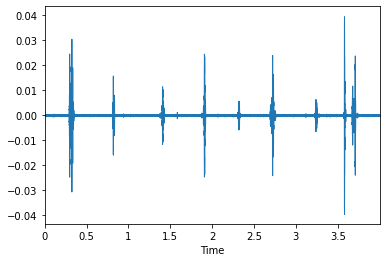

In [ ]:
y,sr = librosa.load('/content/drive/MyDrive/heartbeat-sounds/set_a/extrahls__201101152255.wav',duration = 4)
librosa.display.waveplot(y, sr=sr)

((88200,), <matplotlib.collections.PolyCollection at 0x7fc91aba34c0>)

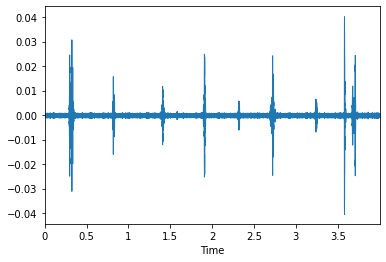

In [ ]:
def addWhiteNoise(signal,noiseFactor):
  noise = np.random.normal(0,signal.std(),signal.size)
  augmented_signal = signal + noise * noiseFactor
  return augmented_signal

y.shape,librosa.display.waveplot(addWhiteNoise(y,0.15),sr = sr)

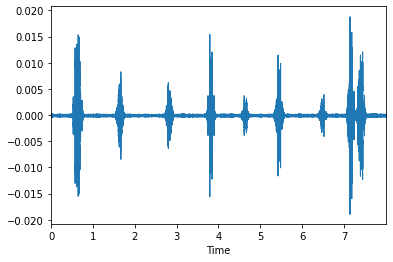

In [ ]:
def TimeStretch(signal,stretchRate):
  return librosa.effects.time_stretch(signal,stretchRate)
librosa.display.waveplot(TimeStretch(y,0.5),sr = sr)

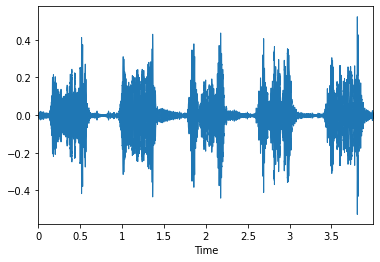

In [ ]:
def PitchScale(signal,sr,num_semitones):
  return librosa.effects.pitch_shift(signal,sr,num_semitones)
librosa.display.waveplot(PitchScale(y,sr,4),sr = sr)

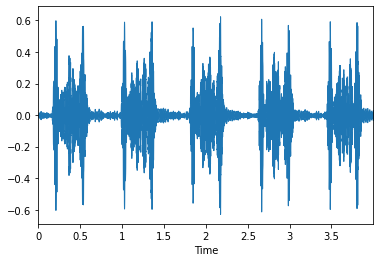

In [ ]:
def inversion(signal):
  return signal * -1
librosa.display.waveplot(inversion(y),sr = sr)

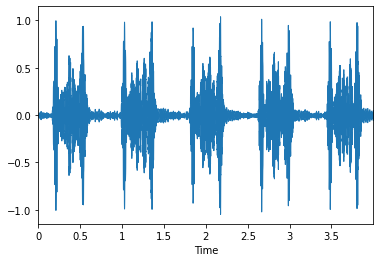

In [ ]:
import random
def randomGain(signal,minimum,maximum):
  gainFac = random.uniform(minimum,maximum)
  return signal * gainFac
librosa.display.waveplot(randomGain(y,1.2,2),sr = sr)

###Extract labels from audio files

In [ ]:
data.shape,classlabel[0]

AttributeError: ignored

In [ ]:
from collections import defaultdict
dataset = []
seta = '/content/drive/MyDrive/heartbeat-sounds/set_a'
setb = '/content/drive/MyDrive/heartbeat-sounds/set_b'
# read all files inside folders sat_a and set_b
for folder in [seta + '/**',setb + '/**']:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            # print(filename,os.path.basename(filename))
            # extracting labels fron file names
            Label = os.path.basename(filename).split('_')[0]
            
            # skip audio smaller than 2 second
            if librosa.get_duration(filename=filename) >= 4:
                if Label not in ['Aunlabelledtest','Bunlabelledtest']:
                    dataset.append({
                        'filename': filename,
                        'label': Label if Label != 'extrahls' else 'normal'
                    })

dataset = pd.DataFrame(dataset)

dataset = shuffle(dataset, random_state=42)
dataset.head()

,filename,label
70,/content/drive/MyDrive/heartbeat-sounds/set_a/...,murmur
218,/content/drive/MyDrive/heartbeat-sounds/set_b/...,murmur
384,/content/drive/MyDrive/heartbeat-sounds/set_b/...,normal
33,/content/drive/MyDrive/heartbeat-sounds/set_a/...,artifact
42,/content/drive/MyDrive/heartbeat-sounds/set_a/...,artifact


Plot for the available diseases

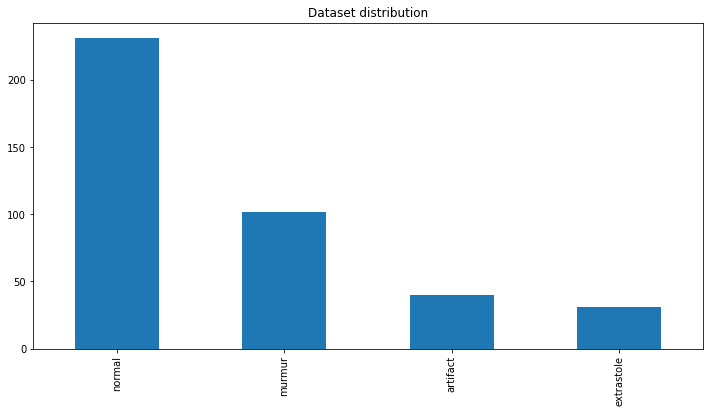

(None, 404)

In [ ]:
plt.figure(figsize=(12,6))
dataset.label.value_counts().plot(kind='bar', title='Dataset distribution')
plt.show(),len(dataset)

In [ ]:
#split the dataset into trainig and testing
train, test = train_test_split(dataset, test_size=0.25, random_state=42)
train.shape, test.shape,train[train["label"] == "extrastole"].count()

((303, 2), (101, 2), filename    23
 label       23
 dtype: int64)

label:  normal
label:  artifact
label:  murmur
label:  extrastole


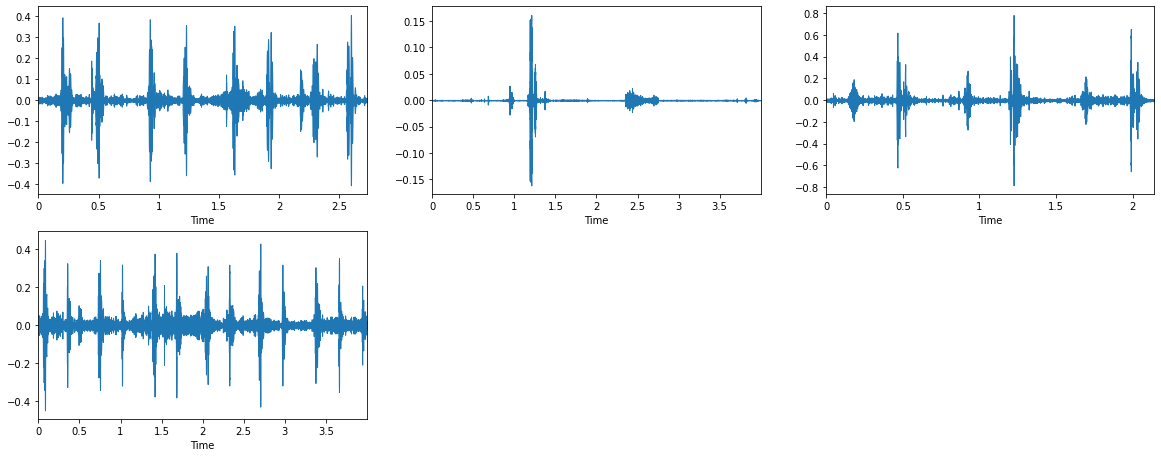

In [ ]:
# data visualisation

plt.figure(figsize=(20,20))
idx = 0
for label in dataset.label.unique():
    print('label: ', label)
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[1], duration=4)
    # waves
    idx+=1
    plt.subplot(5, 3, idx)
    librosa.display.waveplot(y, sr=sr)

plt.show()

In [ ]:
def extract_features2(audio_path):
    y, sr = librosa.load(audio_path, duration=4)
    # print(y.shape)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfcc
# extract_features2(train.filename.iloc[0]).shape,train[train.label== "normal"]

In [ ]:
def Extract(data):
  return librosa.feature.mfcc(y = data,sr = 22050,n_mfcc = 40)

In [ ]:
x_train, x_test = [],[]
print('extract features from TRAIN and TEST dataset')
for idx in tqdm(range(len(train))):
    x_train.append(extract_features2(train.filename.iloc[idx]))
    
for idx in tqdm(range(len(test))):
    x_test.append(extract_features2(test.filename.iloc[idx]))

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)

extract features from TRAIN and TEST dataset


100%|██████████| 101/101 [00:19<00:00,  5.24it/s]

x_train:  (303, 40, 173)
x_test:  (101, 40, 173)


In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(class_weight = 'balanced',
#                                     classes = np.unique(y_train),
#                                     y = y_train)
# #converting the class_weights array into dictionary to use it in model.fit method which requires a dictionary
# weights = dict(zip(np.unique(y_train), class_weights))

x_train = x_train/ x_train.max()
x_test = x_test/x_test.max()

XTRAINLST = x_train
XTESTLST = x_test

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1) 

print(x_train.shape)

(303, 40, 173, 1)


In [ ]:
#convert labels into one hot encoder vectors
import tensorflow as tf


#convert labels into numerical values
encoder = LabelEncoder()
encoder.fit(train.label)
y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)


y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print('X train:', x_train.shape)
print('Y train:', y_train.shape)
print(y_train[0])

print('\nX test:', x_test.shape)
print('Y test:', y_test.shape)

X train: (303, 40, 173, 1)
Y train: (303, 4)
[0. 0. 0. 1.]

X test: (101, 40, 173, 1)
Y test: (101, 4)


###Creating Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, 2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
# 32 32 32 64
model.add(Conv2D(32, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(32, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(4, activation='softmax')) # 5 classes
model.summary()
modelDup = model

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 39, 172, 32)       160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 19, 86, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 19, 86, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 18, 85, 32)        4128      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 42, 32)        0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 9, 42, 32)       

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

##Compiling Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=300
MAX_BATCH=32

best_model_file = '/content/drive/MyDrive/heartbeat-sounds/CNN'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 1.28951, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 2: loss improved from 1.28951 to 1.15073, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 3: loss improved from 1.15073 to 1.08183, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 4: loss improved from 1.08183 to 1.06140, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 5: loss improved from 1.06140 to 1.05120, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 6: loss improved from 1.05120 to 1.04572, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 7: loss did not improve from 1.04572

Epoch 8: loss improved from 1.04572 to 1.04179, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 9: loss did not improve from 1.04179

Epoch 10: loss improved from 1.04179 to 1.03773, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 11: loss improved from 1.03773 to 1.02382, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 12: loss did not improve from 1.02382

Epoch 13: loss did not improve from 1.02382

Epoch 14: loss did not improve from 1.02382

Epoch 15: loss improved from 1.02382 to 1.01837, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 16: loss did not improve from 1.01837

Epoch 17: loss improved from 1.01837 to 1.01610, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 18: loss improved from 1.01610 to 0.99457, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 19: loss improved from 0.99457 to 0.98981, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 20: loss improved from 0.98981 to 0.98904, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 21: loss improved from 0.98904 to 0.97926, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 22: loss improved from 0.97926 to 0.97477, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 23: loss improved from 0.97477 to 0.97384, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 24: loss improved from 0.97384 to 0.96061, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 25: loss improved from 0.96061 to 0.95215, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 26: loss improved from 0.95215 to 0.94077, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 27: loss improved from 0.94077 to 0.93294, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 28: loss improved from 0.93294 to 0.92391, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 29: loss improved from 0.92391 to 0.91315, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 30: loss improved from 0.91315 to 0.90243, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 31: loss improved from 0.90243 to 0.88846, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 32: loss did not improve from 0.88846

Epoch 33: loss improved from 0.88846 to 0.88288, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 34: loss improved from 0.88288 to 0.86012, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 35: loss improved from 0.86012 to 0.85702, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 36: loss improved from 0.85702 to 0.84438, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 37: loss improved from 0.84438 to 0.84005, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 38: loss improved from 0.84005 to 0.83647, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 39: loss improved from 0.83647 to 0.83520, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 40: loss improved from 0.83520 to 0.82185, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 41: loss improved from 0.82185 to 0.81355, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 42: loss did not improve from 0.81355

Epoch 43: loss improved from 0.81355 to 0.80278, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 44: loss did not improve from 0.80278

Epoch 45: loss did not improve from 0.80278

Epoch 46: loss did not improve from 0.80278

Epoch 47: loss did not improve from 0.80278

Epoch 48: loss did not improve from 0.80278

Epoch 49: loss improved from 0.80278 to 0.78545, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 50: loss improved from 0.78545 to 0.78094, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 51: loss did not improve from 0.78094

Epoch 52: loss did not improve from 0.78094

Epoch 53: loss did not improve from 0.78094

Epoch 54: loss did not improve from 0.78094

Epoch 55: loss did not improve from 0.78094

Epoch 56: loss did not improve from 0.78094

Epoch 57: loss did not improve from 0.78094

Epoch 58: loss did not improve from 0.78094

Epoch 59: loss did not improve from 0.78094

Epoch 60: loss improved from 0.78094 to 0.76244, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 61: loss did not improve from 0.76244

Epoch 62: loss did not improve from 0.76244

Epoch 63: loss did not improve from 0.76244

Epoch 64: loss did not improve from 0.76244

Epoch 65: loss did not improve from 0.76244

Epoch 66: loss did not improve from 0.76244

Epoch 67: loss improved from 0.76244 to 0.75652, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 68: loss did not improve from 0.75652

Epoch 69: loss did not improve from 0.75652

Epoch 70: loss did not improve from 0.75652

Epoch 71: loss did not improve from 0.75652

Epoch 72: loss did not improve from 0.75652

Epoch 73: loss did not improve from 0.75652

Epoch 74: loss did not improve from 0.75652

Epoch 75: loss did not improve from 0.75652

Epoch 76: loss did not improve from 0.75652

Epoch 77: loss did not improve from 0.75652

Epoch 78: loss improved from 0.75652 to 0.75473, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 79: loss did not improve from 0.75473

Epoch 80: loss did not improve from 0.75473

Epoch 81: loss did not improve from 0.75473

Epoch 82: loss did not improve from 0.75473

Epoch 83: loss did not improve from 0.75473

Epoch 84: loss did not improve from 0.75473

Epoch 85: loss did not improve from 0.75473

Epoch 86: loss did not improve from 0.75473

Epoch 87: loss did not improve from 0.75473

Epoch 88: loss improved from 0.75473 to 0.74058, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 89: loss did not improve from 0.74058

Epoch 90: loss did not improve from 0.74058

Epoch 91: loss did not improve from 0.74058

Epoch 92: loss did not improve from 0.74058

Epoch 93: loss improved from 0.74058 to 0.73896, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 94: loss improved from 0.73896 to 0.73605, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 95: loss did not improve from 0.73605

Epoch 96: loss did not improve from 0.73605

Epoch 97: loss did not improve from 0.73605

Epoch 98: loss improved from 0.73605 to 0.73151, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 99: loss did not improve from 0.73151

Epoch 100: loss did not improve from 0.73151

Epoch 101: loss improved from 0.73151 to 0.73113, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 102: loss did not improve from 0.73113

Epoch 103: loss improved from 0.73113 to 0.72741, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 104: loss did not improve from 0.72741

Epoch 105: loss did not improve from 0.72741

Epoch 106: loss improved from 0.72741 to 0.72321, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 107: loss did not improve from 0.72321

Epoch 108: loss improved from 0.72321 to 0.71557, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 109: loss did not improve from 0.71557

Epoch 110: loss did not improve from 0.71557

Epoch 111: loss did not improve from 0.71557

Epoch 112: loss did not improve from 0.71557

Epoch 113: loss did not improve from 0.71557

Epoch 114: loss did not improve from 0.71557

Epoch 115: loss improved from 0.71557 to 0.71045, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 116: loss improved from 0.71045 to 0.70411, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 117: loss did not improve from 0.70411

Epoch 118: loss did not improve from 0.70411

Epoch 119: loss did not improve from 0.70411

Epoch 120: loss did not improve from 0.70411

Epoch 121: loss did not improve from 0.70411

Epoch 122: loss improved from 0.70411 to 0.70043, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 123: loss did not improve from 0.70043

Epoch 124: loss did not improve from 0.70043

Epoch 125: loss did not improve from 0.70043

Epoch 126: loss did not improve from 0.70043

Epoch 127: loss did not improve from 0.70043

Epoch 128: loss did not improve from 0.70043

Epoch 129: loss did not improve from 0.70043

Epoch 130: loss did not improve from 0.70043

Epoch 131: loss did not improve from 0.70043

Epoch 132: loss did not improve from 0.70043

Epoch 133: loss did not improve from 0.70043

Epoch 134: loss did not improve from 0.70043

Epoch 135: loss did not improve from 0.70043

Epoch 136: loss did not improve from 0.70043

Epoch 137: loss did not improve from 0.70043

Epoch 138: loss did not improve from 0.70043

Epoch 139: loss did not improve from 0.70043

Epoch 140: loss did not improve from 0.70043

Epoch 141: loss did not improve from 0.70043

Epoch 142: loss did not improve from 0.70043

Epoch 143: loss improved from 0.70043 to 0.69703, saving model to /content/driv


Epoch 144: loss did not improve from 0.69703

Epoch 145: loss did not improve from 0.69703

Epoch 146: loss improved from 0.69703 to 0.69009, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 147: loss did not improve from 0.69009

Epoch 148: loss did not improve from 0.69009

Epoch 149: loss did not improve from 0.69009

Epoch 150: loss did not improve from 0.69009

Epoch 151: loss did not improve from 0.69009

Epoch 152: loss did not improve from 0.69009

Epoch 153: loss did not improve from 0.69009

Epoch 154: loss did not improve from 0.69009

Epoch 155: loss did not improve from 0.69009

Epoch 156: loss did not improve from 0.69009

Epoch 157: loss did not improve from 0.69009

Epoch 158: loss did not improve from 0.69009

Epoch 159: loss improved from 0.69009 to 0.68696, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 160: loss did not improve from 0.68696

Epoch 161: loss did not improve from 0.68696

Epoch 162: loss did not improve from 0.68696

Epoch 163: loss did not improve from 0.68696

Epoch 164: loss did not improve from 0.68696

Epoch 165: loss did not improve from 0.68696

Epoch 166: loss did not improve from 0.68696

Epoch 167: loss did not improve from 0.68696

Epoch 168: loss did not improve from 0.68696

Epoch 169: loss did not improve from 0.68696

Epoch 170: loss improved from 0.68696 to 0.67313, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 171: loss did not improve from 0.67313

Epoch 172: loss did not improve from 0.67313

Epoch 173: loss improved from 0.67313 to 0.67009, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 174: loss did not improve from 0.67009

Epoch 175: loss did not improve from 0.67009

Epoch 176: loss did not improve from 0.67009

Epoch 177: loss did not improve from 0.67009

Epoch 178: loss did not improve from 0.67009

Epoch 179: loss did not improve from 0.67009

Epoch 180: loss did not improve from 0.67009

Epoch 181: loss did not improve from 0.67009

Epoch 182: loss did not improve from 0.67009

Epoch 183: loss did not improve from 0.67009

Epoch 184: loss did not improve from 0.67009

Epoch 185: loss did not improve from 0.67009

Epoch 186: loss did not improve from 0.67009

Epoch 187: loss did not improve from 0.67009

Epoch 188: loss did not improve from 0.67009

Epoch 189: loss improved from 0.67009 to 0.66853, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 190: loss did not improve from 0.66853

Epoch 191: loss did not improve from 0.66853

Epoch 192: loss did not improve from 0.66853

Epoch 193: loss did not improve from 0.66853

Epoch 194: loss did not improve from 0.66853

Epoch 195: loss did not improve from 0.66853

Epoch 196: loss improved from 0.66853 to 0.66241, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 197: loss did not improve from 0.66241

Epoch 198: loss did not improve from 0.66241

Epoch 199: loss did not improve from 0.66241

Epoch 200: loss improved from 0.66241 to 0.64484, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN



Epoch 201: loss did not improve from 0.64484

Epoch 202: loss did not improve from 0.64484

Epoch 203: loss did not improve from 0.64484

Epoch 204: loss did not improve from 0.64484

Epoch 205: loss did not improve from 0.64484

Epoch 206: loss did not improve from 0.64484

Epoch 207: loss did not improve from 0.64484

Epoch 208: loss did not improve from 0.64484

Epoch 209: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 209: loss did not improve from 0.64484

Epoch 210: loss did not improve from 0.64484

Epoch 211: loss did not improve from 0.64484

Epoch 212: loss did not improve from 0.64484

Epoch 213: loss did not improve from 0.64484

Epoch 214: loss did not improve from 0.64484

Epoch 215: loss did not improve from 0.64484

Epoch 216: loss did not improve from 0.64484

Epoch 217: loss did not improve from 0.64484

Epoch 218: loss did not improve from 0.64484

Epoch 219: loss did not improve from 0.64484

Epoch 220: loss did not improve from 0.64484



Epoch 243: loss did not improve from 0.63583

Epoch 244: loss did not improve from 0.63583

Epoch 245: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 245: loss did not improve from 0.63583

Epoch 246: loss did not improve from 0.63583

Epoch 247: loss did not improve from 0.63583

Epoch 248: loss did not improve from 0.63583

Epoch 249: loss did not improve from 0.63583

Epoch 250: loss did not improve from 0.63583

Epoch 251: loss did not improve from 0.63583

Epoch 252: loss did not improve from 0.63583

Epoch 253: loss did not improve from 0.63583

Epoch 254: loss did not improve from 0.63583

Epoch 255: loss did not improve from 0.63583

Epoch 256: loss did not improve from 0.63583

Epoch 257: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 257: loss did not improve from 0.63583

Epoch 258: loss did not improve from 0.63583

Epoch 259: loss did not improve from 0.63583

Epoch 260: loss did not improve from 0.63583

Epoch 261: l

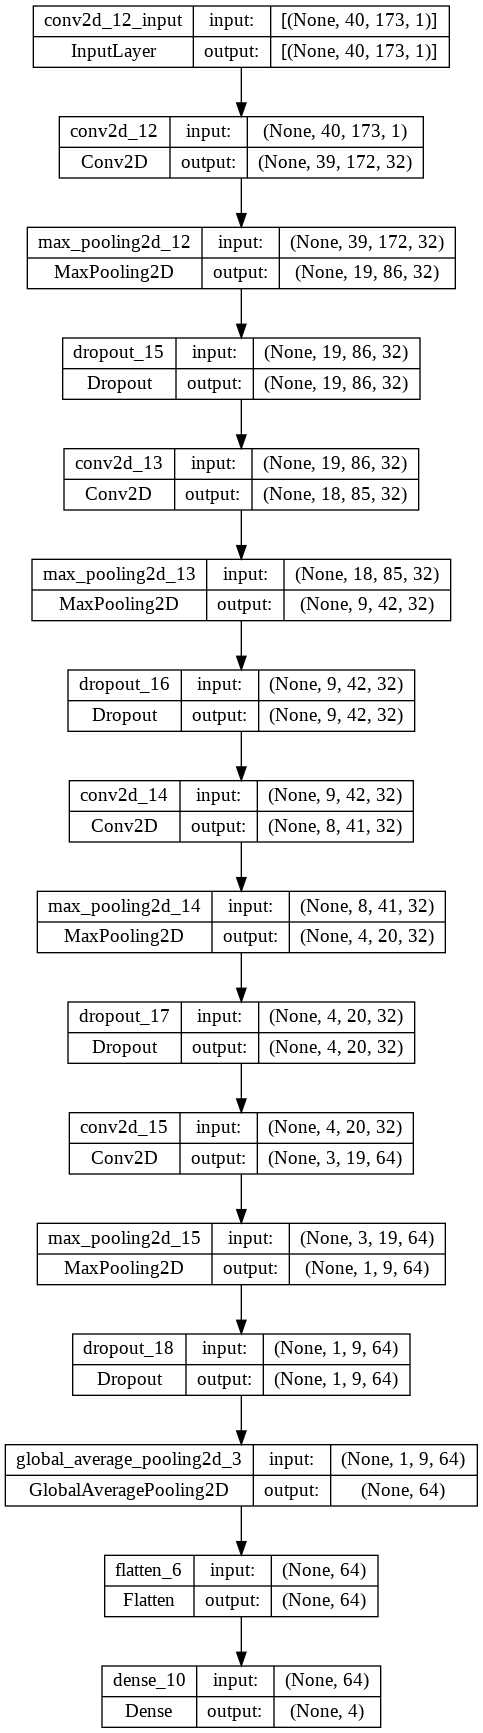

In [ ]:
#visualising model
from tensorflow.keras.utils import plot_model
plot_model(model = model,show_shapes = True)

In [ ]:
def drawTrainLossCurves(history):
  # Loss curves
  plt.figure(figsize=[12,8])
  plt.subplot(2,1,1)
  plt.plot(history.history['loss'], 'r', linewidth=3.0)
  plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # accuracy curves
  plt.figure(figsize=[14,10])
  plt.subplot(2,1,2)
  plt.plot(history.history['acc'], 'r', linewidth=3.0)
  plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
  plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)
  plt.show()

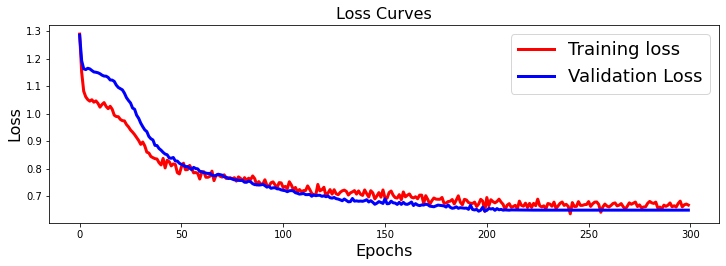

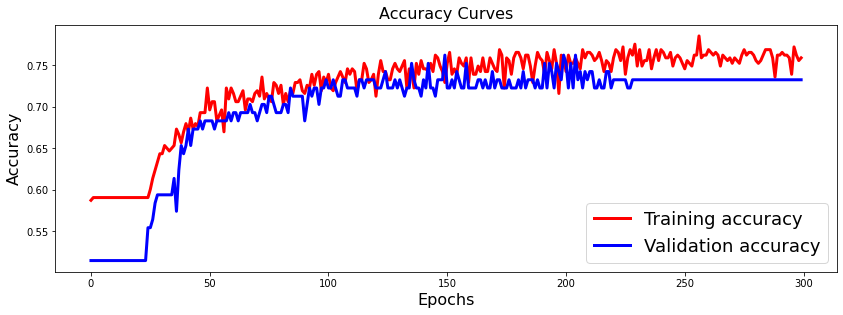

In [ ]:
drawTrainLossCurves(history)

In [ ]:
# save model and weights
model_name = 'heartbeat_disease.h5'
model.save(model_name)
print('Saved trained model at %s' % model_name)

scores = model.evaluate(x_test, y_test, verbose=1)
print('test loss:', scores[0])
print('test accuracy:', scores[1])

predictions = model.predict(x_test, verbose=1)
print(predictions.shape,y_test.shape)

y_true, y_pred = [],[]
y_trueInd,y_predInd = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions):
    y_trueInd.append(np.argmax(y_test[idx]))
    y_predInd.append(np.argmax(prediction))
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])

print(classification_report(y_pred, y_true))

Saved trained model at heartbeat_disease.h5
4/4 [==============================] - 0s 6ms/step - loss: 0.6492 - acc: 0.7327
test loss: 0.6491968631744385
test accuracy: 0.7326732873916626
4/4 [==============================] - 0s 4ms/step
(101, 4) (101, 4)
              precision    recall  f1-score   support

    artifact       0.85      0.92      0.88        12
  extrastole       0.00      0.00      0.00         0
      murmur       0.50      0.88      0.64        16
      normal       0.94      0.67      0.78        73

    accuracy                           0.73       101
   macro avg       0.57      0.62      0.58       101
weighted avg       0.86      0.73      0.77       101



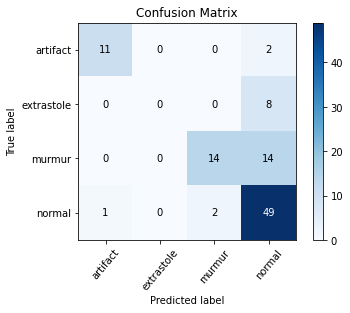

In [ ]:
# Draw Confusion matrix in stylish design

skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
plt.xticks(rotation=50)
plt.show()

In [ ]:
accuracy_score(y_true,y_pred)

0.7326732673267327

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,LSTM, TimeDistributed
from tensorflow.keras.models import Sequential

In [ ]:
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# x_train = tf.squeeze(x_train)"\"
# x_test = tf.squeeze(x_test)

# x_train = x_train*x_train.max()
# x_test = x_test*x_test.max()
print(x_train[0].max(),y_train.max(),x_train.shape)

0.7592189 1.0 (303, 40, 173, 1)


##Lets create LSTM RNN MODEL

In [ ]:
m1 = Sequential()
m1.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (40,173)))
m1.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
m1.add(Dense(4, activation='softmax'))
m1.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
m1.summary()
m1Dup = m1
m1Dup.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 64)            60928     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 73,476
Trainable params: 73,476
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 64)            60928     
                                                                 
 lstm_7 (LSTM)              

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

m1.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=150
MAX_BATCH=32

best_model_file2 = '/content/drive/MyDrive/heartbeat-sounds/LSTM'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file2, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=m1.fit(XTRAINLST, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(XTESTLST, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 1.34288, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 2: loss improved from 1.34288 to 1.14227, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 3: loss improved from 1.14227 to 1.01649, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 4: loss improved from 1.01649 to 0.98955, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 5: loss improved from 0.98955 to 0.95967, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 6: loss improved from 0.95967 to 0.93721, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 7: loss improved from 0.93721 to 0.92006, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 8: loss improved from 0.92006 to 0.89985, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM

Epoch 9: loss improved from 0.89985 to 0.89651, saving model to /content/drive/MyDrive/h

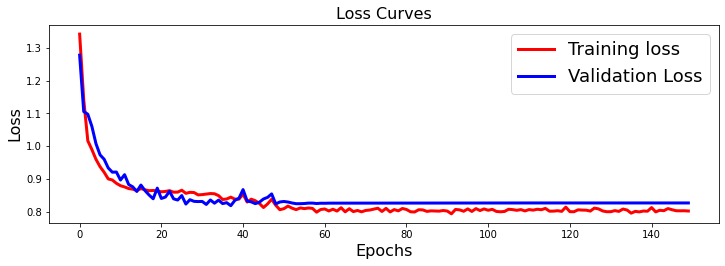

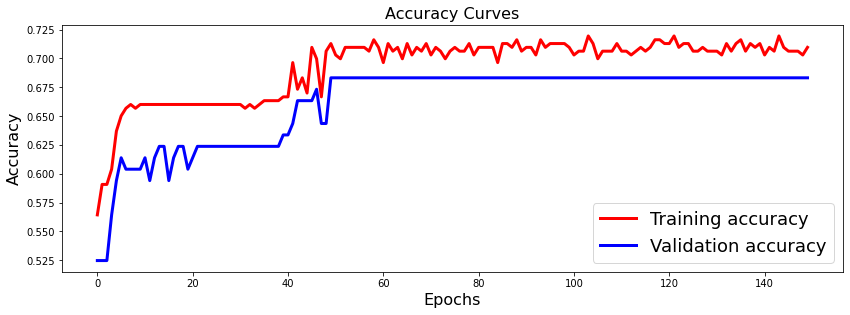

In [ ]:
drawTrainLossCurves(history)

In [ ]:
# save model and weights
def performance(name,model,xtest,ytest):
  model_name = name
  model.save(model_name)

  scores = model.evaluate(xtest, ytest, verbose=1)

  predictions = model.predict(xtest, verbose=1)
  
  y_true, y_pred = [],[]
  y_trueInd,y_predInd = [],[]
  classes = encoder.classes_
  for idx, prediction in enumerate(predictions):
      y_trueInd.append(np.argmax(ytest[idx]))
      y_predInd.append(np.argmax(prediction))
      y_true.append(classes[np.argmax(ytest[idx])])
      y_pred.append(classes[np.argmax(prediction)])

  print(classification_report(y_pred, y_true))
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
  plt.xticks(rotation=50)
  plt.show()


4/4 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

    artifact       0.92      0.92      0.92        13
  extrastole       0.00      0.00      0.00         0
      murmur       0.29      0.80      0.42        10
      normal       0.94      0.63      0.75        78

    accuracy                           0.68       101
   macro avg       0.54      0.59      0.52       101
weighted avg       0.87      0.68      0.74       101



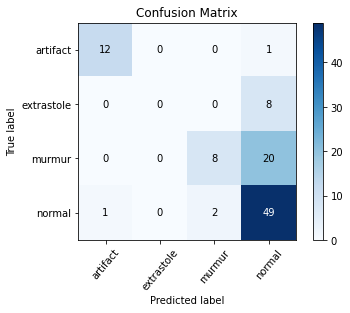

In [ ]:
loadedLSTM = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/LSTM')
performance("model2",loadedLSTM ,XTESTLST, y_test)

In [ ]:
m3 = tf.keras.models.Sequential()
m3.add(tf.keras.Input(shape=(40,173)))
m3.add(tf.keras.layers.Dense(64, activation='relu'))
m3.add(tf.keras.layers.Dense(32, activation='relu'))
m3.add(Flatten())
m3.add(tf.keras.layers.Dense(4,activation = 'softmax'))
m3.summary()
m3Dup = m3

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 40, 64)            11136     
                                                                 
 dense_37 (Dense)            (None, 40, 32)            2080      
                                                                 
 flatten_12 (Flatten)        (None, 1280)              0         
                                                                 
 dense_38 (Dense)            (None, 4)                 5124      
                                                                 
Total params: 18,340
Trainable params: 18,340
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m3.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32

best_model_file3 = '/content/drive/MyDrive/heartbeat-sounds/DNN'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file3, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=m3.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 1.17529, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 2: loss improved from 1.17529 to 1.04447, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 3: loss improved from 1.04447 to 1.02718, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 4: loss improved from 1.02718 to 1.01136, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 5: loss improved from 1.01136 to 0.99610, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 6: loss improved from 0.99610 to 0.98028, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 7: loss improved from 0.98028 to 0.96395, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 8: loss improved from 0.96395 to 0.94683, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN

Epoch 9: loss improved from 0.94683 to 0.92527, saving model to /content/drive/MyDrive/heartbeat

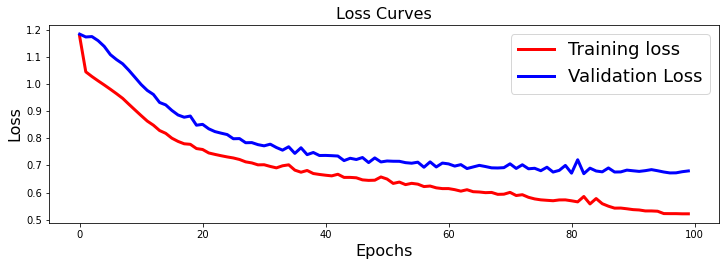

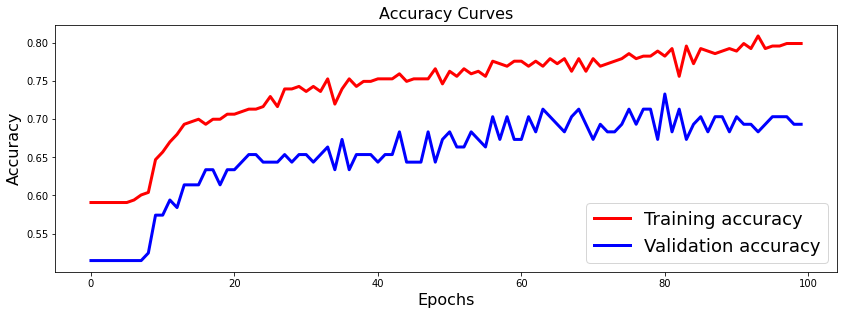

In [ ]:
drawTrainLossCurves(history)

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

    artifact       0.77      1.00      0.87        10
  extrastole       0.00      0.00      0.00         0
      murmur       0.36      0.83      0.50        12
      normal       0.96      0.63      0.76        79

    accuracy                           0.69       101
   macro avg       0.52      0.62      0.53       101
weighted avg       0.87      0.69      0.74       101



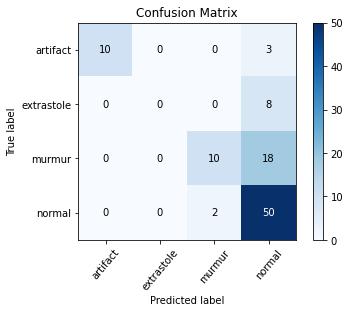

In [ ]:
performance("model3",m3,x_test, y_test)

##Ensemble learning Technique

In [ ]:
import tensorflow as tf
loadedM1 = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN')
loadedM2 = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/DNN')
loadedM3 = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/LSTM')
loadedM3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 64)            60928     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 73,476
Trainable params: 73,476
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack
from collections import defaultdict

 
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
 stackX = None
 for model in members:
  # make prediction
  yhat = model.predict(inputX, verbose=0)
  # stack predictions into [rows, members, probabilities]
  if stackX is None:
    stackX = yhat
  else:
    stackX = dstack((stackX, yhat))
  # flatten predictions to [rows, members x probabilities]
 stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
 return stackX
 
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
 # create dataset using ensemble
 stackedX = stacked_dataset(members, inputX)
 # fit standalone model
 model = LogisticRegression()
 y = []
 for idx,val in enumerate(inputy):
   y.append(np.argmax(val))
 y = np.asarray(y)
 
 model.fit(stackedX, y)
 return model
 
# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
 # create dataset using ensemble
 stackedX = stacked_dataset(members, inputX)
 # make a prediction
 yhat = model.predict(stackedX)
 return yhat
 


members = [loadedM1, loadedM2, loadedM3]


# fit stacked model using the ensemble
model = fit_stacked_model(members, x_test, y_test)

yTestNum = []
for idx,val in enumerate(y_test):
  yTestNum.append(np.argmax(val))
yTestNum = np.asarray(yTestNum)

# evaluate model on test set
yhat = stacked_prediction(members, model, x_test)
acc = accuracy_score(yTestNum, yhat)
print(f'Stacked Test Accuracy: {acc * 100}')

Stacked Test Accuracy: 74.25742574257426


In [ ]:
def CMNum(name,model,yTest,yPred):
  classes = encoder.classes_
  yPredL = []
  yTestL = []
  for val in yPred:
    yPredL.append(classes[val])
  for val in yTest:
    yTestL.append(classes[val])
  print(classification_report(yPredL, yTestL))
  skplt.metrics.plot_confusion_matrix(yTestL, yPredL, normalize=False)
  plt.xticks(rotation=50)
  plt.show()
  

              precision    recall  f1-score   support

    artifact       0.92      1.00      0.96        12
  extrastole       0.00      0.00      0.00         0
      murmur       0.46      0.87      0.60        15
      normal       0.96      0.68      0.79        74

    accuracy                           0.74       101
   macro avg       0.59      0.64      0.59       101
weighted avg       0.88      0.74      0.79       101



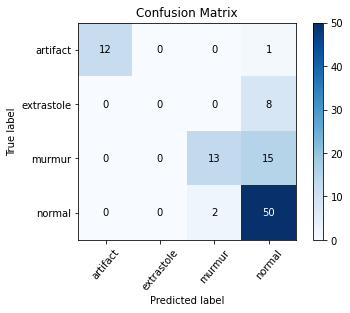

In [ ]:
CMNum("EnsembleLearning",model, yTestNum,yhat)

##Save and load stacked model

In [ ]:
import pickle,joblib
stackedPickle = '/content/drive/MyDrive/heartbeat-sounds/stacked_model.pkl'
      
# Save the model as a pickle in a file
joblib.dump(model, stackedPickle)
  
# Load the model from the file
stk_model_from_joblib = joblib.load(stackedPickle)
  
# Use the loaded model to make predictions
stk_model_from_joblib

LogisticRegression()

In [ ]:
yhat = stacked_prediction(members,stk_model_from_joblib , x_test)
acc = accuracy_score(yTestNum, yhat)
acc = acc*100
acc

74.25742574257426

##Storing transformer accuracy


In [ ]:
TransformerAcc = 52.586

##Comparing all accuracies

In [ ]:
DNN_acc = loadedM2.evaluate(x_test, y_test, verbose=1)[1]*100
CNN_acc = loadedM1.evaluate(x_test, y_test, verbose=1)[1]*100
LSTM_acc = loadedM3.evaluate(x_test, y_test, verbose=1)[1]*100
Stacked_acc = acc

DNN_acc,CNN_acc, LSTM_acc, Stacked_acc,TransformerAcc

4/4 [==============================] - 0s 37ms/step - loss: 0.8262 - acc: 0.6832


(69.30692791938782,
 73.26732873916626,
 68.31682920455933,
 74.25742574257426,
 52.586)

In [ ]:
pd.DataFrame([["DNN",f"{round(DNN_acc, 2)}%"],
              ["CNN",f"{round(CNN_acc, 2)}%"],
              ["LSTM",f"{round(LSTM_acc, 2)}%"],
              ["Ensemble Model",f"{round(Stacked_acc, 2)}%"],
              ["Transformer",f"{round(TransformerAcc, 2)}%"]],
             columns = ["Model","Accuracy"])

,Model,Accuracy
0,DNN,69.31%
1,CNN,73.27%
2,LSTM,68.32%
3,Ensemble Model,74.26%
4,Transformer,52.59%


### SAVE THE MODELS


In [ ]:
model.save('/content/drive/MyDrive/Saved Models/CNN Model')

In [ ]:
loadedModel = tf.keras.models.load_model('/content/drive/MyDrive/Saved Models/CNN Model')
loadedModel.summary()

OSError: ignored

In [ ]:
import librosa
def manipulate(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
from collections import defaultdict
table = []
seta = '/content/drive/MyDrive/heartbeat-sounds/set_a'
setb = '/content/drive/MyDrive/heartbeat-sounds/set_b'
adim = 0
# read all files inside folders sat_a and set_b
for folder in [seta + '/**',setb + '/**']:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            
            Label = os.path.basename(filename).split('_')[0]
            
            # skip audio smaller than 4 second
            if librosa.get_duration(filename=filename) >= 4:
                if Label not in ['Aunlabelledtest','Bunlabelledtest']:
                    x,sr=librosa.load(filename,duration=4)
                    table.append([np.mean(x) for x in librosa.feature.mfcc(x,sr=sr)])
                    table[adim].append(sum(librosa.zero_crossings(x)))
                    table[adim].append(np.mean(librosa.feature.spectral_centroid(x)))
                    table[adim].append(np.mean(librosa.feature.spectral_rolloff(x,sr=sr)))
                    table[adim].append(np.mean(librosa.feature.chroma_stft(x,sr=sr)))
                    table[adim].append(Label)
                    print(table[adim])
                    adim+=1

columns = ["mfkk"+str(i) for i in range(20)]
columns.extend(["zero","centroid","rolloff","chroma","label"])
table[:10]
# table = pd.DataFrame(table,columns)

# table = shuffle(table, random_state=42)
# table.info()

[-240.5425, 113.62044, -18.885824, -34.517643, -20.16574, 29.891247, 49.146496, 36.795227, -8.877255, -39.75701, -21.99849, 22.844654, 24.51919, -5.1869707, -19.320507, -9.075678, -11.970198, -4.650718, 10.061888, 11.412301, 9140, 1442.0466793833018, 1918.9444657695087, 0.11578068, 'artifact']
[35.5587, 51.466114, -38.37809, 23.184351, -20.151642, 2.6928394, -17.060322, 3.9033585, -19.201954, 0.48917332, -9.738535, 4.352876, -8.530513, 7.9952188, -5.1389527, 3.5441194, -10.119043, 3.0499265, -10.438293, 4.2863398, 22086, 3374.339721844764, 6217.805754380419, 0.6805315, 'artifact']
[-317.3641, 172.88751, -13.096318, -7.9617963, -1.7796195, 2.7726014, -4.7574935, -2.4082956, -10.736723, -5.644984, -8.411506, -5.0331063, -8.840361, -3.324679, -7.8154507, -6.9944453, -10.18681, -5.0778704, -7.264776, -2.1076162, 10056, 1623.469703539891, 2980.4193573880057, 0.51122725, 'artifact']


/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[-1076.5814, -35.36337, 30.118176, -26.061901, 12.783062, 2.6328046, -11.9028225, 12.875233, -9.657774, 6.6836553, -4.591074, 3.449626, -4.443296, 4.572967, -5.4262676, 6.1485023, -6.546332, 5.391883, -4.702375, 3.4820275, 64210, 7243.3746514794375, 9470.190711930996, 0.504765, 'artifact']
[-750.54065, 13.443901, 0.5900292, 0.9653201, -0.57365423, 1.5137409, 0.46172553, 0.51788294, -1.7153696, 0.055041276, -1.2063189, -0.44361776, -1.565064, -0.3652391, -1.4857725, -0.5861502, -0.91944945, -0.08206689, -0.56653976, -0.29932556, 58563, 6620.2096435896365, 8771.108426661849, 0.49283144, 'artifact']
[-315.41656, 101.179695, -16.931005, 11.730603, -9.054523, 9.282723, -15.123135, -3.1179936, -13.222574, 2.746839, -17.81414, -5.7383533, -12.042498, 6.5763693, -12.834041, -4.157999, -11.802088, 4.3888173, -5.036021, 5.1298537, 10998, 2324.826838791534, 5035.408857929913, 0.48545575, 'artifact']
[-574.5357, 34.406864, -15.782217, 1.6450905, -15.583373, 2.6812854, -14.247731, 5.256299, -11.670

[[-240.5425,
  113.62044,
  -18.885824,
  -34.517643,
  -20.16574,
  29.891247,
  49.146496,
  36.795227,
  -8.877255,
  -39.75701,
  -21.99849,
  22.844654,
  24.51919,
  -5.1869707,
  -19.320507,
  -9.075678,
  -11.970198,
  -4.650718,
  10.061888,
  11.412301,
  9140,
  1442.0466793833018,
  1918.9444657695087,
  0.11578068,
  'artifact'],
 [35.5587,
  51.466114,
  -38.37809,
  23.184351,
  -20.151642,
  2.6928394,
  -17.060322,
  3.9033585,
  -19.201954,
  0.48917332,
  -9.738535,
  4.352876,
  -8.530513,
  7.9952188,
  -5.1389527,
  3.5441194,
  -10.119043,
  3.0499265,
  -10.438293,
  4.2863398,
  22086,
  3374.339721844764,
  6217.805754380419,
  0.6805315,
  'artifact'],
 [-317.3641,
  172.88751,
  -13.096318,
  -7.9617963,
  -1.7796195,
  2.7726014,
  -4.7574935,
  -2.4082956,
  -10.736723,
  -5.644984,
  -8.411506,
  -5.0331063,
  -8.840361,
  -3.324679,
  -7.8154507,
  -6.9944453,
  -10.18681,
  -5.0778704,
  -7.264776,
  -2.1076162,
  10056,
  1623.469703539891,
  2980.4193

In [ ]:
table1 = np.array(table)

In [ ]:
table1

array([['-240.5425', '113.62044', '-18.885824', ...,
        '1918.9444657695087', '0.11578068', 'artifact'],
       ['35.5587', '51.466114', '-38.37809', ..., '6217.805754380419',
        '0.6805315', 'artifact'],
       ['-317.3641', '172.88751', '-13.096318', ...,
        '2980.4193573880057', '0.51122725', 'artifact'],
       ...,
       ['-457.58047', '174.90576', '40.75014', ..., '970.3633038294797',
        '0.6350175', 'normal'],
       ['-364.1891', '203.54622', '68.02714', ..., '645.8093896766618',
        '0.6677102', 'normal'],
       ['-379.2746', '209.67494', '63.038204', ..., '767.7893842575867',
        '0.6790279', 'normal']], dtype='<U32')

In [ ]:
table1 = pd.DataFrame(table1, columns= columns)
table1 = shuffle(table1, random_state=42)

In [ ]:
table1.shape

(404, 25)

In [ ]:
X = table1.drop('label',axis = 1)
X.head()

,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk14,mfkk15,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,rolloff,chroma
70,-477.83255,81.99082,71.47291,57.609283,43.411705,31.541653,23.603146,17.982294,13.770014,10.135483,...,-1.8793393,-2.0009477,-1.4691323,-0.7493067,-0.18887192,0.006263446,733,161.55404991833373,201.70263389631504,0.6514299
218,-345.71643,172.73302,73.90964,9.796632,6.0717053,20.714174,16.214731,2.285138,2.3520787,11.959026,...,8.233231,3.4973123,-1.924853,0.638198,5.700417,4.6381483,974,247.1401126361781,490.53383535043355,0.67613614
384,-411.90717,202.22876,66.23976,-10.768909,-0.1218581,27.199455,17.854895,-4.896524,-2.3993306,15.274375,...,9.683449,1.6751693,-4.376299,0.53612626,5.892399,2.380786,1369,308.3379705554044,634.9183187319364,0.669031
33,100.92082,31.912891,-13.925104,14.925361,-8.300897,9.4938755,-7.629408,9.107978,-7.761879,7.726552,...,-7.1131725,6.2975893,-7.089748,6.581069,-6.5426145,5.8657393,29343,4189.266159781321,7826.448050261922,0.791642
42,-671.73773,38.062237,-3.986501,23.53255,0.7699118,11.888082,-0.9452033,6.9874077,-3.852184,3.9329891,...,-7.5644417,0.4313268,-6.8358564,0.37405607,-6.462745,0.8863194,34024,3644.854515328951,6662.90826521857,0.76616806


In [ ]:
Y = table1['label']
Y.head()

70       murmur
218      murmur
384      normal
33     artifact
42     extrahls
Name: label, dtype: object

In [ ]:
enc = LabelEncoder()
le=enc.fit(Y)
Y=le.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,test_size=0.2)

In [ ]:
YTrain[0]

4

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth= 10,
 max_features= 5,
 min_samples_split=5,
 n_estimators=300).fit(XTrain,YTrain)
forest

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=5,
                       n_estimators=300)

In [ ]:
from sklearn.metrics import accuracy_score
YPred=forest.predict(XTest)
accuracy_score(YTest,YPred)

0.7407407407407407

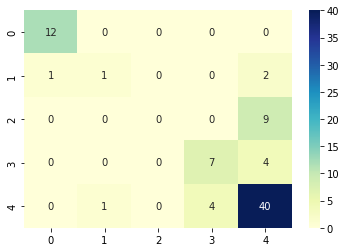

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(YTest,YPred),annot=True,cmap="YlGnBu")

['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']
['normal', 'artifact', 'normal', 'murmur', 'murmur', 'normal', 'murmur', 'artifact', 'normal', 'extrahls', 'murmur', 'normal', 'normal', 'extrastole', 'extrastole', 'normal', 'extrastole', 'artifact', 'normal', 'extrastole', 'extrahls', 'normal', 'normal', 'normal', 'extrastole', 'artifact', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'murmur', 'normal', 'artifact', 'normal', 'normal', 'artifact', 'normal', 'murmur', 'normal', 'normal', 'normal', 'normal', 'artifact', 'normal', 'artifact', 'normal', 'extrastole', 'murmur', 'normal', 'extrastole', 'normal', 'normal', 'normal', 'artifact', 'murmur', 'normal', 'normal', 'normal', 'normal', 'normal', 'murmur', 'normal', 'normal', 'extrastole', 'artifact', 'normal', 'artifact', 'extrahls', 'normal', 'extrastole', 'normal', 'murmur', 'normal', 'normal', 'normal', 'extrahls', 'artifact', 'murmur', 'normal']


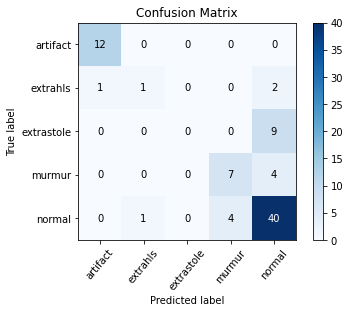

In [ ]:
YTRUELIST, YPREDLIST = [],[]
cl = enc.classes_
print(cl)
for idx, prediction in enumerate(YTest):
    YTRUELIST.append(cl[YTest[idx]])
    YPREDLIST.append(cl[YPred[idx]])
print(YTRUELIST)
skplt.metrics.plot_confusion_matrix(YTRUELIST, YPREDLIST, normalize=False)
plt.xticks(rotation=50)
plt.show()

In [ ]:
YTest[:10]

array([0, 4, 4, 4, 4, 4, 4, 4, 3, 2])

In [ ]:
YPred[:10]

array([0, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
from sklearn.utils import resample

###We realised extrastole is same as Normal , so we treat both labels as normal

In [ ]:
from collections import defaultdict
NewDataset = []
seta = '/content/drive/MyDrive/heartbeat-sounds/set_a'
setb = '/content/drive/MyDrive/heartbeat-sounds/set_b'
# read all files inside folders sat_a and set_b
for folder in [seta + '/**',setb + '/**']:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            # print(filename,os.path.basename(filename))
            # extracting labels fron file names
            Label = os.path.basename(filename).split('_')[0]
            
            # skip audio smaller than 4 second
            if librosa.get_duration(filename=filename) >= 4:
                if Label not in ['Aunlabelledtest','Bunlabelledtest']:
                    if Label == "normal" or Label == "extrastole":
                      NewDataset.append({
                        'filename': filename,
                        'label': "normal"
                      })
                    else:
                      NewDataset.append({
                          'filename': filename,
                          'label': Label
                      })

NewDataset = pd.DataFrame(NewDataset)

NewDataset = shuffle(NewDataset, random_state=42)
NewDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 70 to 102
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  404 non-null    object
 1   label     404 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


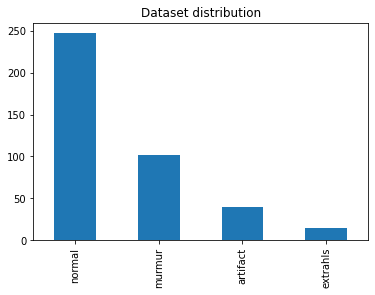

In [ ]:
NewDataset.label.value_counts().plot(kind='bar', title='Dataset distribution')

In [ ]:
TrainDfMajority = NewDataset[NewDataset.label=="normal"]
TrainDfM1 = NewDataset[NewDataset.label=="murmur"]
TrainDfM2 = NewDataset[NewDataset.label=="extrahls"]
TrainDfM3 = NewDataset[NewDataset.label=="artifact"]

In [ ]:
numSamples = TrainDfMajority.shape[0]

DfM1Upsampled = resample(TrainDfM1, 
                                 replace=True,     # sample with replacement
                                 n_samples=numSamples,    # to match majority class
                                 random_state=42) # reproducible results

DfM2Upsampled = resample(TrainDfM2, 
                                 replace=True,     
                                 n_samples=numSamples,    
                                 random_state=42) 
DfM3Upsampled = resample(TrainDfM3, 
                                 replace=True,     
                                 n_samples=numSamples,    
                                 random_state=42)


In [ ]:
DfUpsampled = pd.concat([TrainDfMajority, 
                          DfM1Upsampled, 
                          DfM2Upsampled,
                          DfM3Upsampled], 
                         ignore_index=False)

In [ ]:
DfUpsampled.label.value_counts(),DfUpsampled.shape

(normal      247
 murmur      247
 extrahls    247
 artifact    247
 Name: label, dtype: int64, (988, 2))

In [ ]:
NewTrain, NewTest = train_test_split(DfUpsampled, test_size=0.25, random_state=42)

In [ ]:
NewTest.shape,NewTrain.shape

((247, 2), (741, 2))

In [ ]:
x_tr = []
print('extract features from TRAIN and TEST dataset')
for idx in tqdm(range(len(NewTrain))):
    x_tr.append(extract_features2(NewTrain.filename.iloc[idx]))
x_tr = np.asarray(x_tr)

extract features from TRAIN and TEST dataset


100%|██████████| 741/741 [02:11<00:00,  5.63it/s]


In [ ]:
x_te = []
for idx in tqdm(range(len(NewTest))):
    x_te.append(extract_features2(NewTest.filename.iloc[idx]))
x_te = np.asarray(x_te)

100%|██████████| 247/247 [00:41<00:00,  6.02it/s]


In [ ]:
x_tr = x_tr/ x_tr.max()
x_tr = x_tr.reshape(x_tr.shape[0], x_tr.shape[1], x_tr.shape[2], 1) 
x_tr.shape

(741, 40, 173, 1)

In [ ]:
x_te = x_te/ x_te.max()
x_te = x_te.reshape(x_te.shape[0], x_te.shape[1], x_te.shape[2], 1) 
x_te.shape

(247, 40, 173, 1)

In [ ]:
import tensorflow as tf


#convert labels into numerical values
newEncod = LabelEncoder()
newEncod.fit(NewTrain.label)
yTrainNew = newEncod.transform(NewTrain.label)
yTestNew = newEncod.transform(NewTest.label)


yTrainNew = tf.keras.utils.to_categorical(yTrainNew)
yTestNew = tf.keras.utils.to_categorical(yTestNew)

In [ ]:
yTestNew.shape,yTrainNew.shape

((247, 4), (741, 4))

In [ ]:
m5 = Sequential()
m5.add(Conv2D(32, 2, input_shape=(x_tr.shape[1],x_tr.shape[2],x_tr.shape[3]), activation='relu'))

m5.add(MaxPooling2D(pool_size=2))
m5.add(Dropout(0.2))
# 32 32 32 64
m5.add(Conv2D(32, 2, activation='relu'))
m5.add(MaxPooling2D(pool_size=2))
m5.add(Dropout(0.2))

m5.add(Conv2D(32, 2, activation='relu'))
m5.add(MaxPooling2D(pool_size=2))
m5.add(Dropout(0.2))

m5.add(Conv2D(64, 2, activation='relu'))
m5.add(MaxPooling2D(pool_size=2))
m5.add(Dropout(0.5))
m5.add(GlobalAveragePooling2D())

m5.add(Flatten())
m5.add(Dense(4, activation='softmax')) # 4 classes
m5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 172, 32)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 86, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 86, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)         0

In [ ]:
m5.compile(loss='categorical_crossentropy', metrics=['accuracy'], 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay = 1e-5))
h5 = m5.fit(x_tr, yTrainNew,
                    batch_size=32,
                    epochs=300,
                    validation_data=(x_te, yTestNew),
                    # callbacks = [monitor],
                    shuffle=True)

Epoch 1/300
24/24 [==============================] - 9s 26ms/step - loss: 1.3453 - accuracy: 0.3549 - val_loss: 1.2740 - val_accuracy: 0.6923
Epoch 2/300
24/24 [==============================] - 0s 9ms/step - loss: 1.0719 - accuracy: 0.6194 - val_loss: 0.8647 - val_accuracy: 0.6721
Epoch 3/300
24/24 [==============================] - 0s 9ms/step - loss: 0.7495 - accuracy: 0.6964 - val_loss: 0.6932 - val_accuracy: 0.7449
Epoch 4/300
24/24 [==============================] - 0s 9ms/step - loss: 0.6289 - accuracy: 0.7341 - val_loss: 0.6522 - val_accuracy: 0.6964
Epoch 5/300
24/24 [==============================] - 0s 10ms/step - loss: 0.5857 - accuracy: 0.7490 - val_loss: 0.6188 - val_accuracy: 0.7733
Epoch 6/300
24/24 [==============================] - 0s 10ms/step - loss: 0.6042 - accuracy: 0.7328 - val_loss: 0.5861 - val_accuracy: 0.7490
Epoch 7/300
24/24 [==============================] - 0s 9ms/step - loss: 0.5438 - accuracy: 0.7625 - val_loss: 0.5558 - val_accuracy: 0.7652
Epoch 8/30

In [ ]:
m5.save('/content/drive/MyDrive/Saved Models/AugmentedModel2')

8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        63
    extrahls       1.00      0.97      0.98        65
      murmur       0.92      0.97      0.94        60
      normal       0.93      0.92      0.92        59

    accuracy                           0.96       247
   macro avg       0.96      0.96      0.96       247
weighted avg       0.96      0.96      0.96       247



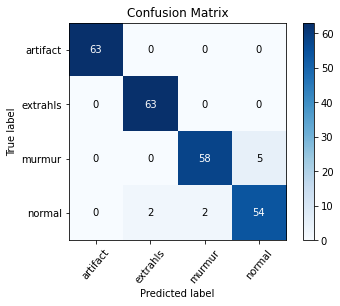

In [ ]:
performance("AugmentedModel",m5,x_te,yTestNew,newEncod)

In [ ]:
import tensorflow as tf
loadedModel = tf.keras.models.load_model('/content/drive/MyDrive/Saved Models/AugmentedModel2')
loadedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 172, 32)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 86, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 86, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)         0

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 6.1 MB/s 
     |████████████████████████████████| 278 kB 44.6 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 106 kB 58.7 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 2.3 MB 68.7 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=61cb0816b00956cdeead610b5cb8cc1cc462f76f0d5517df0035112f9a771df6
  Stored in direct

In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
import torch
import torchaudio
import noisereduce as nr
import numpy as np
import joblib
import librosa
warnings.filterwarnings('ignore')

In [ ]:
def preprocessing(waveform,sr):
  waveform = waveform.astype('float32')
 
  waveform = torch.from_numpy(waveform).unsqueeze(0)
  waveform = torchaudio.transforms.Resample(sr, 22050)(waveform)
  
  if len(waveform[0]) < 88200:
    return [False,-1]

  waveform = np.asarray(waveform[0][:88200])
  waveform = waveform/waveform.max()
  mfcc = librosa.feature.mfcc(waveform, sr=22050, n_mfcc=40)
  
  mfcc = mfcc / mfcc.max()
  mfcc = mfcc.reshape(1,mfcc.shape[0],mfcc.shape[1],1)
  return [True,mfcc]

In [ ]:
import gradio as gr
import random

def classifyAudio(audio):
  sr,waveform = audio
  b,mfcc = preprocessing(waveform,sr)
  if not b: return "Duration is less than 4 sec"

  loadedModel = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/DNN')

  prediction = loadedModel.predict(mfcc).tolist()
  
  for i in prediction:
    pred = i
  
  c = 0
  hmap = {}
  for val in pred:
    hmap[encoder.classes_[c]] = val
    c += 1
  
  
  return hmap

audio = gr.inputs.Audio(type = "numpy")
label = gr.outputs.Label(num_top_classes = 4)

gr.Interface(fn = classifyAudio, inputs = audio, outputs = label,
             capture_session = True).launch(debug = True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 102ms/step
Keyboard interruption in main thread... closing server.
